In [1]:
#processing
import pandas as pd
import numpy as np
#visualisation
import seaborn as sns
import matplotlib.pyplot as plt
#postgresql connection
import psycopg2

In [2]:
#connecting to db
conn = psycopg2.connect(host='localhost', port=5432, dbname='Accepted', user='postgres', password='postgres')

In [ ]:
#data reviewing and cleaning

In [3]:
# accepted
sql = "select 8 from accpt;"
accpt = pd.read_sql_query(sql, conn)
conn = None

In [3]:
accpt.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term;;;
0,38556199,NaN,20000.0,20000.0,20000.0,36 months,12.39,668.02,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,;;;
1,38546368,NaN,3500.0,3500.0,3500.0,36 months,8.67,110.77,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,;;;
2,38415133,NaN,25000.0,25000.0,25000.0,36 months,6.99,771.82,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,;;;
3,38494883,NaN,12000.0,12000.0,12000.0,36 months,6.99,370.48,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,;;;
4,38556220,NaN,6000.0,6000.0,6000.0,36 months,13.66,204.08,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,;;;


In [4]:
accpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633894 entries, 0 to 633893
Columns: 151 entries, id to settlement_term;;;
dtypes: float64(112), object(39)
memory usage: 730.3+ MB


In [14]:
#delete all empty columns
accpt = accpt.dropna(axis = 1, how='all')
accpt.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term;;;
0,38556199,20000.0,20000.0,20000.0,36 months,12.39,668.02,C,C1,carpenter,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,;;;
1,38546368,3500.0,3500.0,3500.0,36 months,8.67,110.77,B,B1,It Support Manager,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,;;;
2,38415133,25000.0,25000.0,25000.0,36 months,6.99,771.82,A,A3,Program Technician,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,;;;
3,38494883,12000.0,12000.0,12000.0,36 months,6.99,370.48,A,A3,Teacher,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,;;;
4,38556220,6000.0,6000.0,6000.0,36 months,13.66,204.08,C,C3,Assistant Fitness Director,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,;;;


In [6]:
#show the percentage of empty values for each row
for col in accpt.columns:
    pct_missing = np.mean(accpt[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
loan_amnt - 1%
funded_amnt - 1%
funded_amnt_inv - 1%
term - 1%
int_rate - 1%
installment - 1%
grade - 1%
sub_grade - 1%
emp_title - 9%
emp_length - 8%
home_ownership - 1%
annual_inc - 1%
verification_status - 1%
issue_d - 1%
loan_status - 1%
pymnt_plan - 1%
url - 1%
desc - 100%
purpose - 1%
title - 3%
zip_code - 1%
addr_state - 1%
dti - 1%
delinq_2yrs - 1%
earliest_cr_line - 1%
fico_range_low - 1%
fico_range_high - 1%
inq_last_6mths - 1%
mths_since_last_delinq - 52%
mths_since_last_record - 84%
open_acc - 1%
pub_rec - 1%
revol_bal - 1%
revol_util - 1%
total_acc - 1%
initial_list_status - 1%
out_prncp - 1%
out_prncp_inv - 1%
total_pymnt - 1%
total_pymnt_inv - 1%
total_rec_prncp - 1%
total_rec_int - 1%
total_rec_late_fee - 1%
recoveries - 1%
collection_recovery_fee - 1%
last_pymnt_d - 1%
last_pymnt_amnt - 1%
next_pymnt_d - 39%
last_credit_pull_d - 1%
last_fico_range_high - 1%
last_fico_range_low - 1%
collections_12_mths_ex_med - 1%
mths_since_last_major_derog - 74%
policy_code - 

In [15]:
#delete columns with a lot of empty values
accpt.drop(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'desc', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_tl_120dpd_2m', 'hardship_type', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term;;;'], axis = 1, inplace = True)

In [8]:
accpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633894 entries, 0 to 633893
Columns: 105 entries, id to debt_settlement_flag
dtypes: float64(81), object(24)
memory usage: 507.8+ MB


In [16]:
#drop empty rows
accpt.dropna(inplace=True)

<AxesSubplot:>

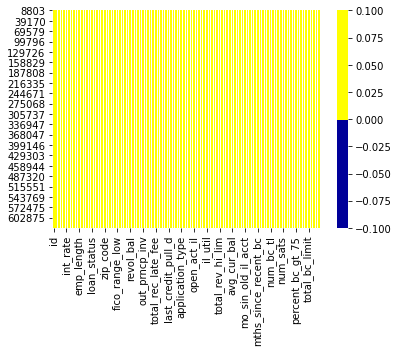

In [10]:
#heatmap of missing data
cols = accpt.columns[:]
colours = ['#000099', '#ffff00'] 
sns.heatmap(accpt[cols].isnull(), cmap=sns.color_palette(colours))

In [11]:
#show all columns
pd.set_option('display.max_columns', None)
accpt.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
8803,130954621,5000.0,5000.0,5000.0,36 months,20.39,186.82,D,D4,General Manager,8 years,RENT,50000.0,Verified,Mar-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Other,740xx,OK,21.80,1.0,Jan-2009,665.0,669.0,0.0,5.0,0.0,116.0,23.2,18.0,w,3780.31,3780.31,2043.69,2043.69,1219.69,824.00,0.0,0.0,0.0,Mar-2019,186.82,Mar-2019,609.0,605.0,0.0,1.0,Individual,0.0,0.0,19344.0,0.0,2.0,0.0,1.0,16.0,14118.0,51.0,1.0,2.0,85.0,58.0,500.0,9.0,0.0,5.0,3.0,3869.0,384.0,23.2,1.0,0.0,80.0,13.0,11.0,11.0,0.0,11.0,4.0,2.0,2.0,2.0,2.0,15.0,2.0,2.0,2.0,5.0,0.0,1.0,1.0,77.8,0.0,0.0,0.0,33430.0,19344.0,500.0,27820.0,N,Cash,N
8804,130964697,15000.0,15000.0,15000.0,36 months,9.92,483.45,B,B2,IT Director,2 years,OWN,196000.0,Source Verified,Mar-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,337xx,FL,18.29,0.0,Jul-1998,700.0,704.0,0.0,19.0,0.0,24243.0,46.3,53.0,w,10878.50,10878.50,5301.42,5301.42,4121.50,1179.92,0.0,0.0,0.0,Feb-2019,483.45,Mar-2019,694.0,690.0,0.0,1.0,Individual,0.0,0.0,534954.0,4.0,3.0,2.0,2.0,6.0,113470.0,59.0,4.0,12.0,10495.0,51.0,52400.0,4.0,1.0,7.0,15.0,31468.0,7368.0,74.1,0.0,0.0,141.0,236.0,4.0,4.0,5.0,11.0,0.0,4.0,10.0,5.0,16.0,11.0,14.0,37.0,10.0,19.0,0.0,0.0,6.0,98.0,75.0,0.0,0.0,605228.0,137713.0,28500.0,147178.0,N,Cash,N
8805,130955326,11200.0,11200.0,11200.0,60 months,30.79,367.82,G,G1,Client services,< 1 year,RENT,44000.0,Not Verified,Mar-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,medical,Medical expenses,030xx,NH,43.97,1.0,Jul-2007,665.0,669.0,2.0,8.0,0.0,1526.0,24.6,14.0,w,10193.73,10193.73,4007.70,4007.70,1006.27,3001.43,0.0,0.0,0.0,Feb-2019,367.82,Mar-2019,629.0,625.0,0.0,1.0,Joint App,0.0,0.0,67173.0,1.0,4.0,1.0,4.0,8.0,65647.0,89.0,1.0,1.0,1011.0,84.0,6200.0,8.0,1.0,10.0,5.0,8397.0,632.0,66.7,0.0,0.0,124.0,128.0,5.0,5.0,0.0,34.0,1.0,2.0,3.0,2.0,3.0,8.0,4.0,6.0,3.0,8.0,0.0,0.0,2.0,71.4,0.0,0.0,0.0,80367.0,67173.0,1900.0,74167.0,N,Cash,N
8806,130504052,25000.0,25000.0,25000.0,60 months,21.85,688.35,D,D5,Asphalt Supervisor,10+ years,MORTGAGE,65000.0,Source Verified,Mar-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,361xx,AL,12.89,1.0,Mar-1995,665.0,669.0,1.0,7.0,0.0,8657.0,98.4,16.0,w,22188.73,22188.73,7511.16,7511.16,2811.27,4699.89,0.0,0.0,0.0,Feb-2019,688.35,Mar-2019,669.0,665.0,0.0,1.0,Individual,0.0,0.0,74795.0,0.0,2.0,0.0,2.0,16.0,8382.0,82.0,0.0,0.0,3237.0,90.0,8800.0,4.0,3.0,3.0,2.0,10685.0,63.0,98.1,0.0,0.0,69.0,126.0,72.0,16.0,2.0,

In [12]:
accpt.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,478545.000000,478545.000000,478545.000000,478545.000000,478545.00000,4.785450e+05,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,4.785450e+05,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,4.785450e+05,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.0,478545.000000,4.785450e+05,4.785450e+05,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,4.785450e+05,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,4.785450e+05,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,4.785450e+05,4.785450e+05,4.785450e+05,4.785450e+05
mean,15475.197056,15475.138545,15470.320396,12.941059,457.21958,8.244183e+04,20.253959,0.317255,701.242955,705.243122,0.504095,12.316081,0.194713,1.682732e+04,47.790032,24.511154,6689.719707,6688.350092,9915.960082,9912.235076,7757.815958,2065.527142,1.536550e+00,91.080436,15.911590,2985.952881,693.245994,683.570218,0.021542,1.0,0.003853,2.326287e+02,1.522338e+05,0.944845,3.303591,0.760601,1.753595,16.833698,4.037380e+04,69.243973,1.288107,2.763496,5966.508535,59.204601,3.655586e+04,1.084665,1.554562,2.120950,4.792287,13572.055173,12788.902532,54.762517,0.008091,14.027487,125.473991,174.826660,13.974792,7.730468,1.436630,24.146780,0.524793,3.718129,5.617119,4.906341,7.373898,9.361389,8.313858,13.492140,5.537557,12.275813,0.002566,0.084115,2.181663,94.000905,38.540469,0.131394,0.045039,1.921649e+05,5.734787e+04,2.500316e+04,5.195080e+04
std,9626.109113,9626.113738,9624.439544,5.211616,280.37451,7.899780e+04,13.491507,0.900773,34.089324,34.090032,0.798324,5.851897,0.556659,2.274695e+04,24.598731,12.025728,8340.549314,8339.525136,8598.450213,8595.282057,7623.384935,2145.826155,1.308146e+01,581.213906,102.876413,5961.919164,66.621404,97.059709,0.162451,0.0,0.066037,9.132215e+03,1.636257e+05,1.137551,3.121083,0.948328,1.579333,17.505790,4.513282e+04,23.748687,1.496617,2.588802,5653.728706,19.410443,3.534717e+04,1.516985,2.718729,2.418403,3.256610,15311.390834,17560.349316,28.746736,0.103423,823.896322,54.484418,94.069822,16.855049,7.233026,1.758406,31.007148,1.458863,2.372843,3.471517,3.143346,4.534178,7.539550,4.815773,7.918995,3.343141,5.835447,0.052854,0.522055,1.899947,9.297378,35.937611,0.365635,0.364749,1.851564e+05,5.230931e+04,2.401256e+04,4.667750e+04
min,1000.000000,1000.000000

In [17]:
#clean up columns, where median values are zero
for column in accpt:
    if accpt.dtypes[column] == np.float64:
        if accpt[column].median() == 0.0:
            accpt.drop(column,axis = 1, inplace=True)

In [14]:
accpt.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,fico_range_low,fico_range_high,open_acc,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,policy_code,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,478545.000000,478545.000000,478545.000000,478545.000000,478545.00000,4.785450e+05,478545.000000,478545.000000,478545.000000,478545.000000,4.785450e+05,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.0,4.785450e+05,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,4.785450e+05,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,4.785450e+05,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,478545.000000,4.785450e+05,4.785450e+05,4.785450e+05,4.785450e+05
mean,15475.197056,15475.138545,15470.320396,12.941059,457.21958,8.244183e+04,20.253959,701.242955,705.243122,12.316081,1.682732e+04,47.790032,24.511154,6689.719707,6688.350092,9915.960082,9912.235076,7757.815958,2065.527142,2985.952881,693.245994,683.570218,1.0,1.522338e+05,0.944845,3.303591,0.760601,1.753595,16.833698,4.037380e+04,69.243973,1.288107,2.763496,5966.508535,59.204601,3.655586e+04,1.084665,2.120950,4.792287,13572.055173,12788.902532,54.762517,125.473991,174.826660,13.974792,7.730468,1.436630,24.146780,3.718129,5.617119,4.906341,7.373898,9.361389,8.313858,13.492140,5.537557,12.275813,2.181663,94.000905,38.540469,1.921649e+05,5.734787e+04,2.500316e+04,5.195080e+04
std,9626.109113,9626.113738,9624.439544,5.211616,280.37451,7.899780e+04,13.491507,34.089324,34.090032,5.851897,2.274695e+04,24.598731,12.025728,8340.549314,8339.525136,8598.450213,8595.282057,7623.384935,2145.826155,5961.919164,66.621404,97.059709,0.0,1.636257e+05,1.137551,3.121083,0.948328,1.579333,17.505790,4.513282e+04,23.748687,1.496617,2.588802,5653.728706,19.410443,3.534717e+04,1.516985,2.418403,3.256610,15311.390834,17560.349316,28.746736,54.484418,94.069822,16.855049,7.233026,1.758406,31.007148,2.372843,3.471517,3.143346,4.534178,7.539550,4.815773,7.918995,3.343141,5.835447,1.899947,9.297378,35.937611,1.851564e+05,5.230931e+04,2.401256e+04,4.667750e+04
min,1000.000000,1000.000000,775.000000,5.310000,29.76000,3.200000e+01,-1.000000,660.000000,664.000000,2.000000,0.000000e+00,0.000000,3.000000,0.000000,0.000000,17.580000,17.580000,0.000000,0.000000,0.000000,499.000000,0.000000,1.0,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.148000e+03,0.000000e+00,1.000000e+02,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,9.430000,251.68000,5.000000e+04,13.380000,675.000000,679.000000,8.000000,5.938000e+03,28.700000,16.000000,0.000000,0.000000,3781.390000,3779.580000,2474.180000,664.470000,301.060000,664.000000,660.000000,

In [ ]:
#fill numeric missing values with mean and object values with previous values
accpt.fillna(accpt.mean(), inplace=True)
accpt.fillna(method='ffill', inplace=True)

In [15]:
#saving prepared and clean data
accpt.to_csv('accepted_prep.csv')

In [6]:
# rejected
conn = psycopg2.connect(host='localhost', port=5432, dbname='Accepted', user='postgres', password='postgres')

sql1 = "select 8 from rejected;"
rej = pd.read_sql_query(sql1, conn)
conn = None

In [3]:
rej.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2016-04-01,other,NaN,2.69%,331xx,FL,< 1 year,0.0
1,4000.0,2016-04-01,debt_consolidation,NaN,28.26%,834xx,ID,< 1 year,0.0
2,5000.0,2016-04-01,moving,NaN,-1%,648xx,MO,NaN,0.0
3,1000.0,2016-04-01,moving,628.0,21.43%,380xx,TN,< 1 year,0.0
4,3000.0,2016-04-01,Debt consolidation,NaN,8.49%,895xx,NV,2 years,2.0


In [4]:
rej.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293084 entries, 0 to 293083
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Amount Requested      293084 non-null  float64
 1   Application Date      293084 non-null  object 
 2   Loan Title            293069 non-null  object 
 3   Risk_Score            50069 non-null   float64
 4   Debt-To-Income Ratio  293084 non-null  object 
 5   Zip Code              293062 non-null  object 
 6   State                 293084 non-null  object 
 7   Employment Length     278874 non-null  object 
 8   Policy Code           293084 non-null  float64
dtypes: float64(3), object(6)
memory usage: 20.1+ MB


In [5]:
#show and drop columns with only zero value
(rej['Policy Code'] == 0.0).sum()

292021

In [6]:
rej.drop(['Policy Code'], axis = 1, inplace = True)

In [7]:
#change percentage into number
rej['Debt-To-Income Ratio'] = pd.to_numeric(rej['Debt-To-Income Ratio'].str.strip('%'))

In [8]:
rej.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length
0,1000.0,2016-04-01,other,NaN,2.69,331xx,FL,< 1 year
1,4000.0,2016-04-01,debt_consolidation,NaN,28.26,834xx,ID,< 1 year
2,5000.0,2016-04-01,moving,NaN,-1.00,648xx,MO,NaN
3,1000.0,2016-04-01,moving,628.0,21.43,380xx,TN,< 1 year
4,3000.0,2016-04-01,Debt consolidation,NaN,8.49,895xx,NV,2 years


In [9]:
#show the percentage of empty values for each row
for col in rej.columns:
    pct_missing = np.mean(rej[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Amount Requested - 0%
Application Date - 0%
Loan Title - 0%
Risk_Score - 83%
Debt-To-Income Ratio - 0%
Zip Code - 0%
State - 0%
Employment Length - 5%


In [10]:
rej.drop(['Risk_Score'], axis = 1, inplace = True)

In [11]:
rej.to_csv('rejected_prep.csv')

In [ ]:
#data analysis

<AxesSubplot:>

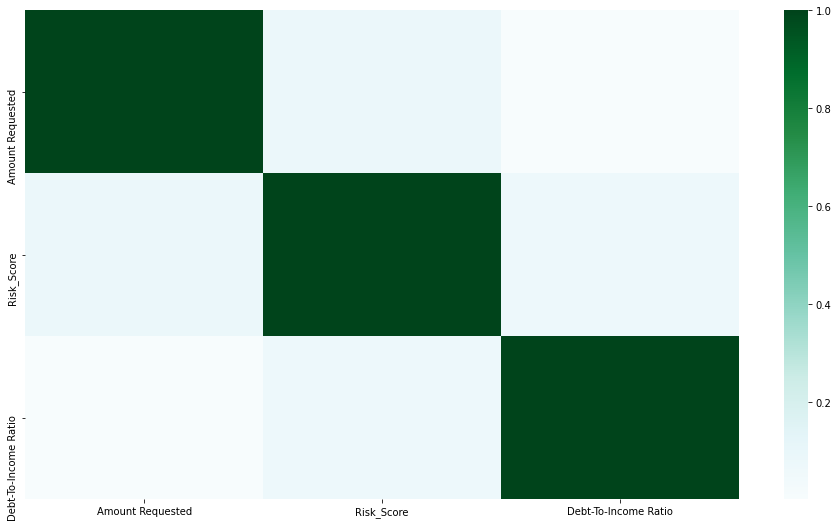

In [27]:
# 1 - H0 - 2nd file's attributes have influence on risk score
#corr map with numeric values
plt.figure(figsize = (16,9))
sns.heatmap(rej.corr(), cmap = 'BuGn')

<AxesSubplot:xlabel='Employment Length', ylabel='Risk_Score'>

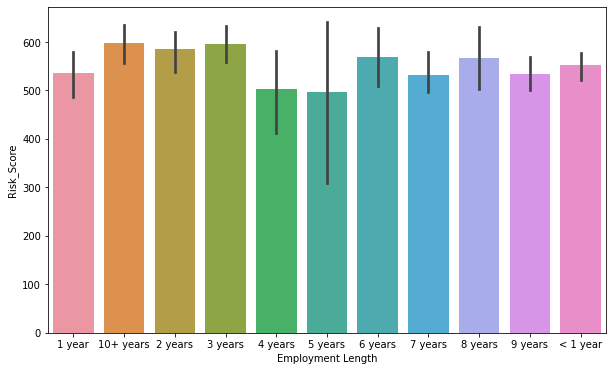

In [32]:
#diagram with categorical value
sort_df = pd.DataFrame(rej, columns = ['Employment Length', 'Risk_Score'])
plt.figure(figsize = (10,6))
sns.barplot(x = "Employment Length", y = "Risk_Score", data = sort_df.sort_values(by = 'Employment Length'))

<AxesSubplot:xlabel='grade', ylabel='dti'>

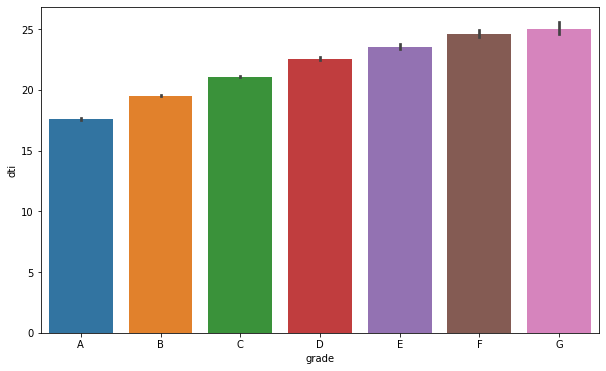

In [18]:
#H0 - 2nd file's attributes have influence on grade
#debt to income and grade
plt.figure(figsize = (10,6))
sns.barplot(x = "grade", y = "dti", data = accpt.sort_values(by = 'grade'))

<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

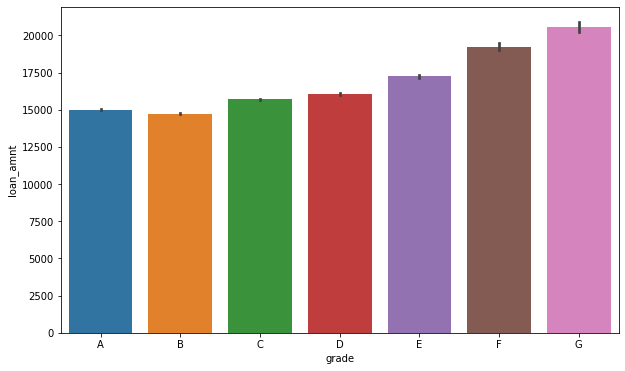

In [19]:
#loan amount and grade
plt.figure(figsize = (10,6))
sns.barplot(x = "grade", y = "loan_amnt", data = accpt.sort_values(by = 'grade'))

In [20]:
#employment length and grade
df_gr = pd.DataFrame(accpt, columns = ['grade', 'emp_length'])
lst_gr = {'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10}
df_gr.emp_length = [lst_gr[item] for item in df_gr.emp_length]

df_gr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478545 entries, 8803 to 633893
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   grade       478545 non-null  object
 1   emp_length  478545 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 11.0+ MB


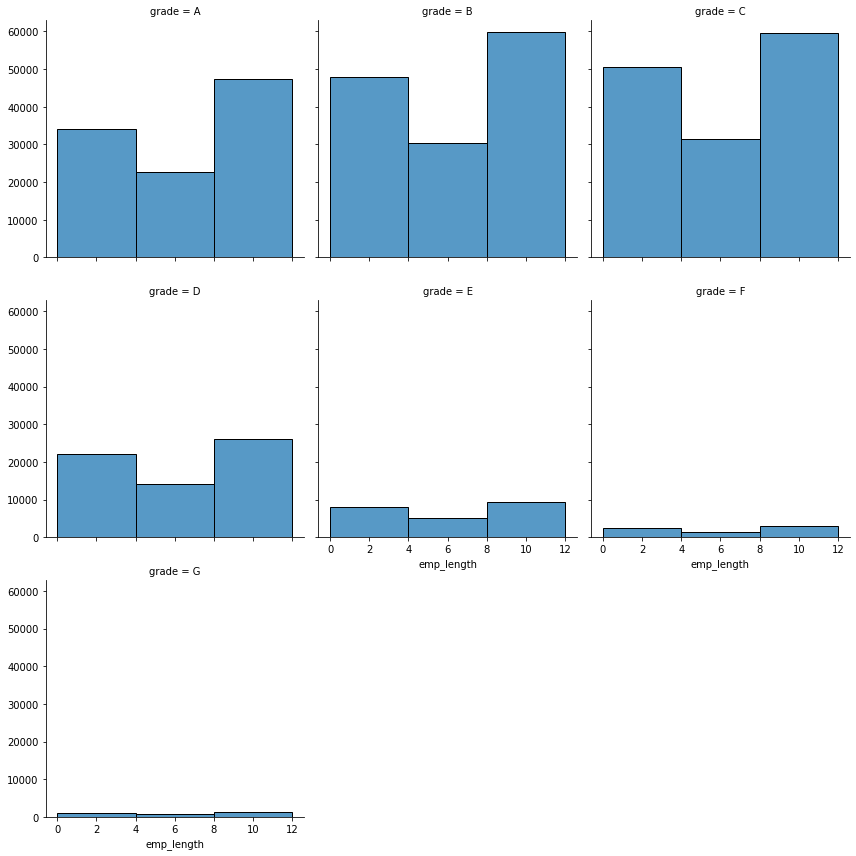

In [21]:
sort_gr = df_gr.sort_values(by = 'grade')
g = sns.FacetGrid(sort_gr, col="grade", height=4, col_wrap=3)
g.map(sns.histplot, "emp_length", binwidth=4)

In [22]:
# 3 - H0 - grade is formed with the influence of an income
#sorting data (income is less than a million, dti is lower than 100)
leq1mil = accpt['annual_inc'] <= 1e6
accpt = accpt[leq1mil]
accpt = accpt[accpt.dti < 100.0]

In [24]:
#income by profession
pd.options.display.float_format = '{:,.0f}'.format

#another filters
salary_limit = 7e4

emp_annual_all = accpt.loc[((accpt['annual_inc'] >= 1.2e5) & (accpt['verification_status'] == 'Verified')) 
                              | ((accpt['annual_inc'] >= salary_limit) & (accpt['annual_inc'] < 1.2e5)) 
                              | ((accpt['annual_inc'] < salary_limit) & (accpt['verification_status'] == 'Verified')),
                              ['emp_title','annual_inc']].groupby('emp_title')

summ_inc = emp_annual_all.agg(['min','mean','median','max', 'count'])
summ_inc.columns = summ_inc.columns.levels[1]
summ_inc = summ_inc.sort_values(by = ['median','min'], ascending = False)

# Filter for professions with more than 500(1 now) observations
summ_inc = summ_inc[summ_inc['count'] >= 500].sort_values(by = ['median','min'], ascending = False)
summ_inc

,min,mean,median,max,count
emp_title,,,,,
Vice President,"15,000","150,320","110,000","845,394",648
Director,"25,000","125,093","103,000","1,000,000",1148
President,"25,000","136,405","100,000","1,000,000",969
Attorney,"42,500","113,186","96,000","800,000",703
Controller,"35,000","98,514","94,949","650,000",538
Software Engineer,"41,000","97,591","94,400","260,000",653
Sales Manager,"30,000","102,710","94,000","600,000",778
Engineer,"28,600","96,589","94,000","250,000",1248
Project Manager,"34,000","92,189","90,000","300,000",1823


<AxesSubplot:title={'center':'annual_inc'}, xlabel='grade'>

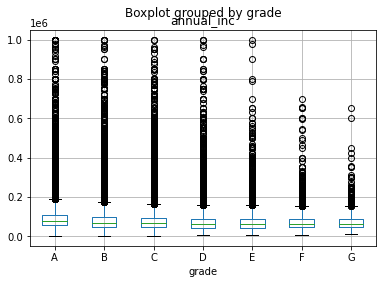

In [25]:
accpt.boxplot(by = 'grade', column = 'annual_inc')

<AxesSubplot:title={'center':'annual_inc'}, xlabel='verification_status'>

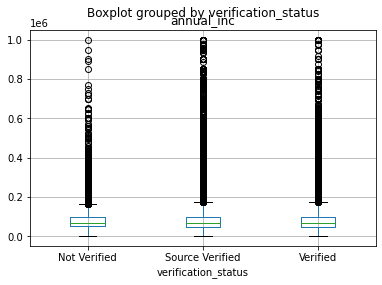

In [26]:
df = pd.DataFrame(accpt, columns = ['verification_status', 'annual_inc'])
med_df = df.loc[df['annual_inc'] > 75000]

accpt.boxplot(by = 'verification_status', column = 'annual_inc')

<AxesSubplot:title={'center':'annual_inc'}, xlabel='verification_status'>

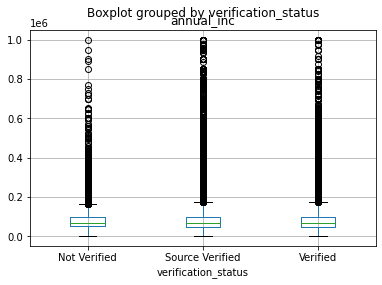

In [27]:
df = pd.DataFrame(accpt, columns = ['verification_status', 'annual_inc'])
med_df = df.loc[df['annual_inc'] < 75000]

accpt.boxplot(by = 'verification_status', column = 'annual_inc')

<AxesSubplot:xlabel='grade'>

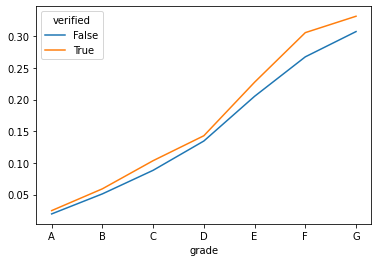

In [28]:
# 4 - H0 - Lending Club tends to take the effort to verify a borrower's income only when it is high
accpt['verified'] = accpt['verification_status'] == 'Verified'
grade_yr_loanamnt = pd.pivot_table(accpt,index=["grade","verified"], values=['loan_amnt'], aggfunc=np.sum)

grade_yr_loanamnt_default = pd.pivot_table(accpt[(accpt.loan_status == 'Charged Off') | (accpt.loan_status == 'Default')], index=["grade","verified"], values=['loan_amnt'], aggfunc=np.sum)

grade_yr_loanamnt_default.columns = ['Charged_off']

loan_verified = pd.merge(grade_yr_loanamnt, grade_yr_loanamnt_default, left_index = True, right_index = True)
loan_verified['chargeoff_rate']  = loan_verified['Charged_off'] /  loan_verified['loan_amnt'] 

loan_verified_unstack = loan_verified.unstack("verified")
verified_chargedoff = loan_verified_unstack['chargeoff_rate']
verified_chargedoff.plot()

<AxesSubplot:xlabel='grade', ylabel='count'>

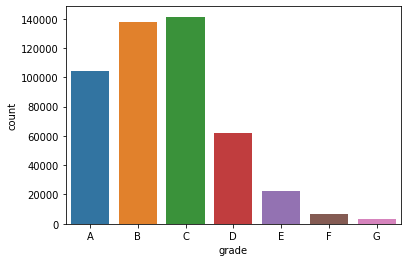

In [29]:
#visualisation for dashboards
#distribution of grades
sns.countplot(x="grade", label="Count", data=accpt.sort_values(by = 'grade'))

<AxesSubplot:ylabel='Frequency'>

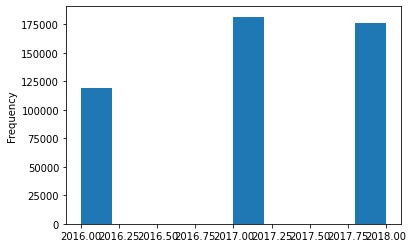

In [30]:
#changes in Club's loan portfolios since 2012 (in case)
accpt.term = accpt.term.apply(str)
accpt['term'] = accpt['term'].apply(lambda x: x.strip().split(" ")[0])

accpt.issue_d = pd.to_datetime(accpt.issue_d)
accpt['issue_yr'] = accpt.issue_d.dt.year
accpt['issue_yr'].plot.hist()

<AxesSubplot:xlabel='loan_status', ylabel='count'>

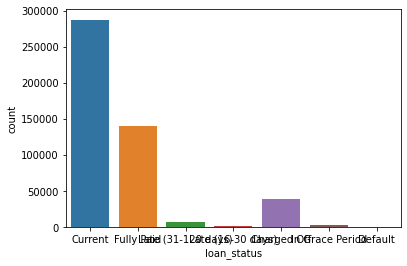

In [31]:
#loan status
sns.countplot(x=accpt["loan_status"], label="Count")

<AxesSubplot:ylabel='Frequency'>

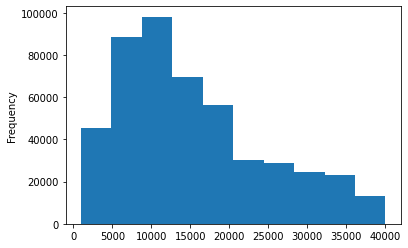

In [32]:
#loan amount distribution
accpt['loan_amnt'].plot.hist()

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

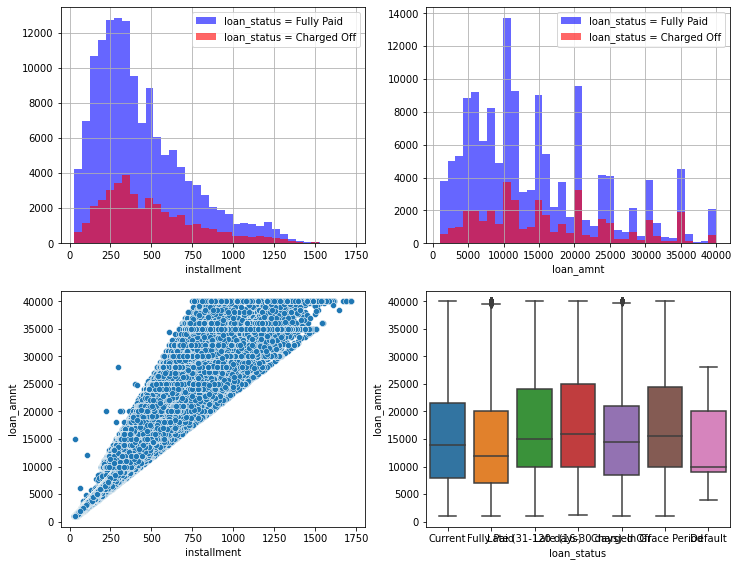

In [33]:
#loan_amnt & installment
plt.figure(figsize=(12, 20))

plt.subplot(4, 2, 1)
accpt[accpt["loan_status"] == "Fully Paid"]["installment"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
accpt[accpt["loan_status"] == "Charged Off"]["installment"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("installment")

plt.subplot(4, 2, 2)
accpt[accpt["loan_status"] == "Fully Paid"]["loan_amnt"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
accpt[accpt["loan_status"] == "Charged Off"]["loan_amnt"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("loan_amnt")

plt.subplot(4, 2, 3)
sns.scatterplot(x='installment', y='loan_amnt', data=accpt)

plt.subplot(4, 2, 4)
sns.boxplot(x='loan_status', y='loan_amnt', data=accpt)